# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,plot_confusion_matrix,recall_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 

In [ ]:
# -Our client comes with problem that in thier last economics year,credit card delinquency rates have been increased.
# -Credit card deliquency refers to customer fails to repayment of credit card bill for more than one month.
# -The credit card company performs a charge off on delinquent credit cards and face losses.
# -The credit card charge off rates shows the percentage of deafaulted credit card balances compare to total 
#  amount of credit outstanding.
# -Charge off rate impact profitabillity of company.
# -Also This problem leads to increasing credits given to customers and leads for cash flowing problem for company.

# -So,the coampany may be able to prevent loss by predicting such customers who will not pay crdit card bills for running 
# month(credit card defaulters) by using machine learning algorithms and providing such customers with alternative options 
# such as forbearance or debt consolidation .
# -It would also help company to take decission who to give credit card and what credit limits to provide.
# -Also helps company have better understanding of their current and potential customers,which would(to whom) inform their 
# future stratergy,future credit products.

# Hypothesis Generation

In [ ]:
# H0 : The total amount of credit given for credit card user.
    
# H1 : The customers monthly source of income and monthly income.
    
# H2 : Gender of customers.
    
# H3 : Education of the customer from that we can get thier financial condition.
    
# H4 : Customers maritial status ,also number of family members.
    
# H5 : Age of the customer.
    
# H6 : Repayment status for last 5 month of the customer.

# H7 : Amount of credit card bill generated for last 5 months of customer.
    
# H8 : Amount of bill repayment done by customer for last 5 months.

# H9 : Any other loans EMI 
    

# Data Gathering

In [2]:
df = pd.read_csv(r"UCI_credit_card.csv")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.rename({"PAY_0":"PAY_1","default.payment.next.month":"default"},axis=1,inplace=True)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [7]:
df.shape

(30000, 25)

In [8]:
df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [9]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## default

In [12]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

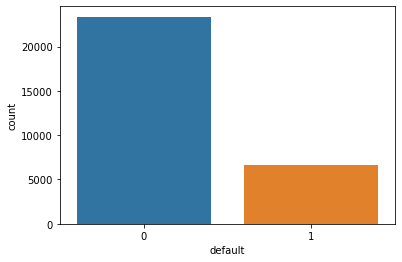

In [13]:
sns.countplot(df.default)

## LIMIT_BAL

In [14]:
df.LIMIT_BAL.unique()

array([  20000.,  120000.,   90000.,   50000.,  500000.,  100000.,
        140000.,  200000.,  260000.,  630000.,   70000.,  250000.,
        320000.,  360000.,  180000.,  130000.,  450000.,   60000.,
        230000.,  160000.,  280000.,   10000.,   40000.,  210000.,
        150000.,  380000.,  310000.,  400000.,   80000.,  290000.,
        340000.,  300000.,   30000.,  240000.,  470000.,  480000.,
        350000.,  330000.,  110000.,  420000.,  170000.,  370000.,
        270000.,  220000.,  190000.,  510000.,  460000.,  440000.,
        410000.,  490000.,  390000.,  580000.,  600000.,  620000.,
        610000.,  700000.,  670000.,  680000.,  430000.,  550000.,
        540000., 1000000.,  530000.,  710000.,  560000.,  520000.,
        750000.,  640000.,   16000.,  570000.,  590000.,  660000.,
        720000.,  327680.,  740000.,  800000.,  760000.,  690000.,
        650000.,  780000.,  730000.])

In [15]:
print("Max credit given to customer >>",max(df.LIMIT_BAL),"Min credit given to customer >>",min(df.LIMIT_BAL))

Max credit given to customer >> 1000000.0 Min credit given to customer >> 10000.0


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

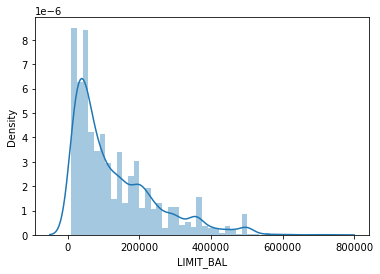

In [16]:
sns.distplot(df[df["default"]==1]["LIMIT_BAL"])

In [17]:
# The customer who has credit in range between 10000 to 200000 has more number of defaults.

## SEX

In [18]:
df.SEX.value_counts()  # 1=male, 2=female

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

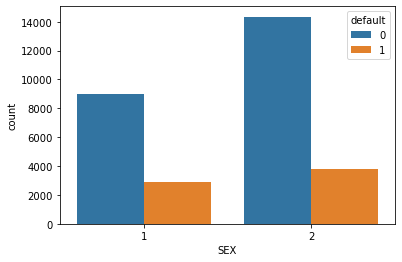

In [19]:
 sns.countplot(x = df["SEX"] , hue = df["default"] )

In [20]:
#There no major difference both male and female defaulters number are nearly same .

## EDUCATION

In [21]:
df.EDUCATION.value_counts()  

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
#Here for categories 0,5,6, we will merge into "4" as we know first four categories only.

# 1=graduate school, 2=university, 3=high school, 4=others

In [23]:
df["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)

In [24]:
df.EDUCATION.value_counts()  

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

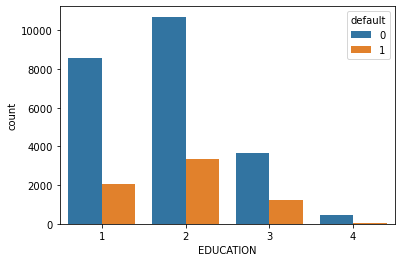

In [25]:
 sns.countplot(x = df["EDUCATION"] , hue = df["default"] )

In [26]:
#Most defaulters are highly educated (graduated from university) after that comes who are graduated from school/collage

## MARRIAGE

In [27]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [28]:
#So here also we have three categories such as ;
# 1=married, 2=single, 3=others
# so for 0 we will merge that with 3.

In [29]:
df["MARRIAGE"].replace({0:3},inplace=True)

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

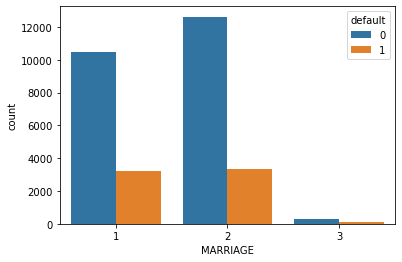

In [30]:
 sns.countplot(x = df["MARRIAGE"] , hue = df["default"] )

In [31]:
#There is no major difference the customers who are single are slightly more in numbers as defaulters.

## AGE

In [32]:
df["AGE"].nunique()

56

<AxesSubplot:xlabel='AGE', ylabel='Density'>

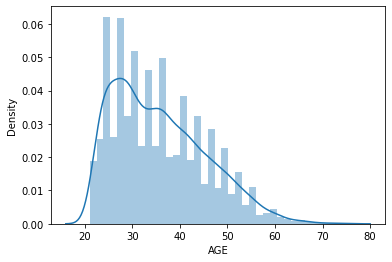

In [33]:
sns.distplot(df[df["default"]==1]["AGE"])

In [34]:
#From graph we can say that the customers whose age lie between 25-40 are more considered as defauters.

## PAY_1

In [35]:
#This column is about repayment status for september month
df["PAY_1"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

<AxesSubplot:xlabel='PAY_1', ylabel='count'>

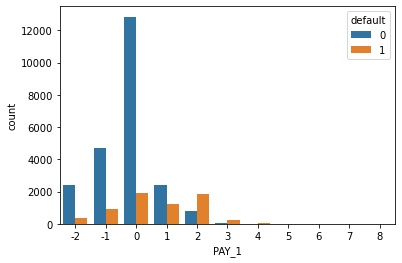

In [36]:
 sns.countplot(x = df["PAY_1"] , hue = df["default"] )

In [37]:
#There are more defaulters who are Using revolving credit,who delay payment for 1 month and 2 month also.
#Also we can say that non defaulters are using revolving cretdit mostly.

## PAY_1 to PAY_6

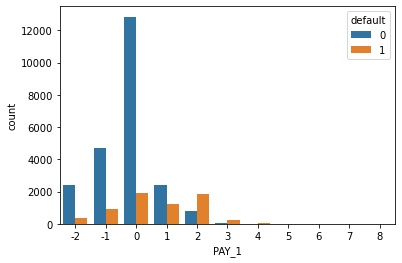

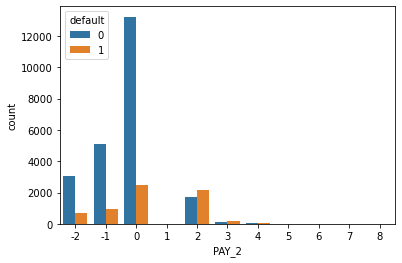

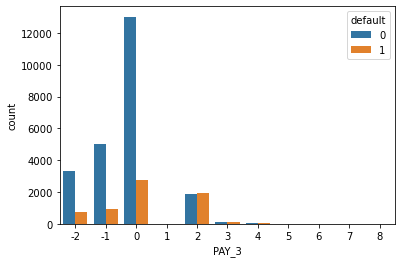

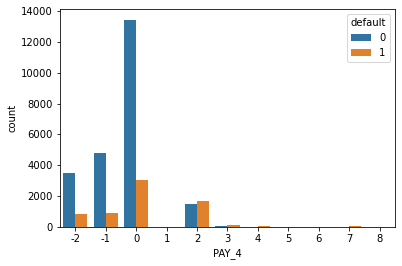

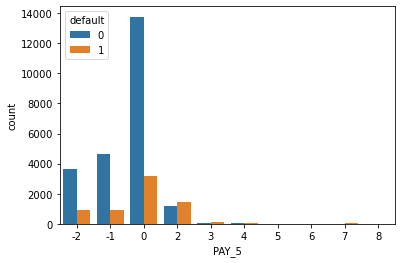

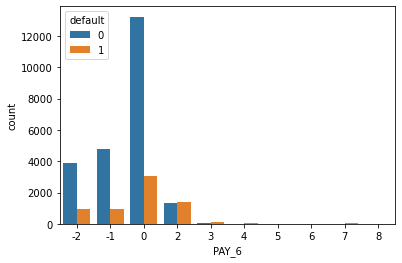

In [38]:
repayment_columns= ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for i in repayment_columns:
    sns.countplot(x = df[i] , hue = df["default"] )
    plt.show()

In [39]:
# In general we can say that for all repayments from April to september the customers who are using revolving credit and 
# delaying payment more tahn one month are defaulters.

## BILL_AMT1

In [40]:
#Ampount of bill generated for september month
df["BILL_AMT1"].nunique()

22723

In [41]:
print("Maximum bill generated for september month >>",max(df["BILL_AMT1"]))
print("Minimum bill generated for september month >>",min(df["BILL_AMT1"]))

Maximum bill generated for september month >> 964511.0
Minimum bill generated for september month >> -165580.0


<AxesSubplot:xlabel='BILL_AMT1', ylabel='Density'>

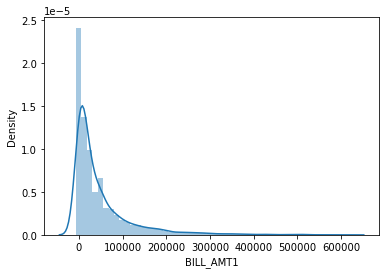

In [42]:
sns.distplot(df[df["default"]==1]["BILL_AMT1"])

In [43]:
#More defaulters are when bill genrated is in range of 20000 to 80000.

## BILL_AMT_1 to BILL_AMT_6

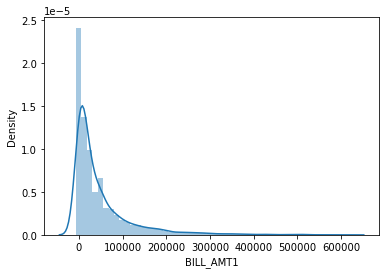

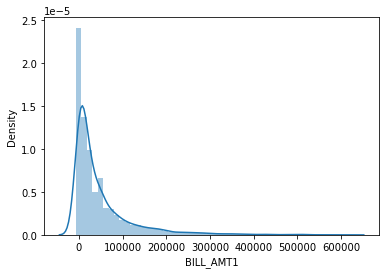

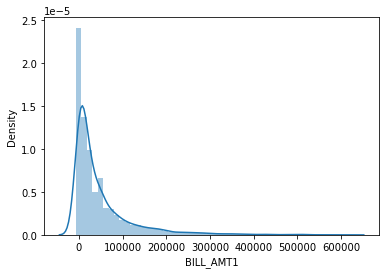

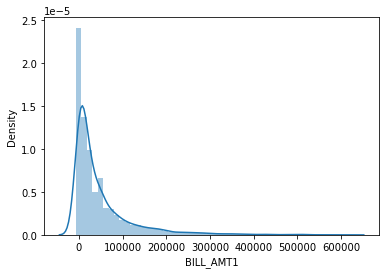

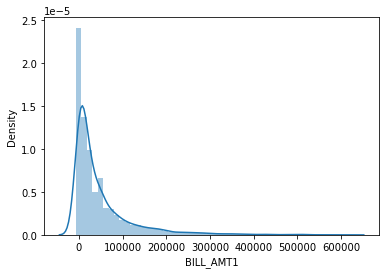

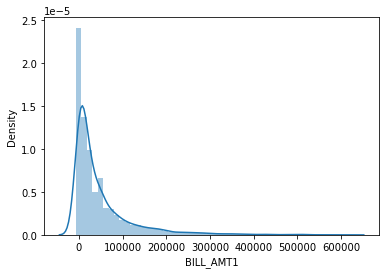

In [44]:
bill_amt_lst = ["BILL_AMT_1","BILL_AMT_2","BILL_AMT_3","BILL_AMT_4","BILL_AMT_5","BILL_AMT_6"]
for i in bill_amt_lst:
    sns.distplot(df[df["default"]==1]["BILL_AMT1"])
    plt.show()

In [45]:
# In general for more defaulters for all bill amounts generated for months april to september are in range of 
# 20000 to 80000.

## PAY_AMT1

In [46]:
df["PAY_AMT1"].nunique()

7943

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Density'>

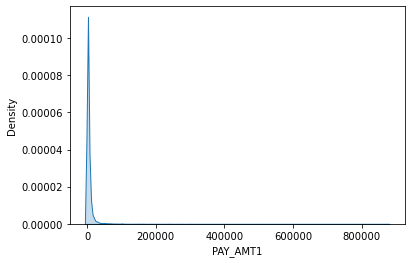

In [47]:
#For numerical columns BILL_AMT 1 to 6 and PAY_AMT 1 to 6 there is no distribution of data.
# (not folowing gausian distribution)
sns.kdeplot(df["PAY_AMT1"],fill=True)

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Density'>

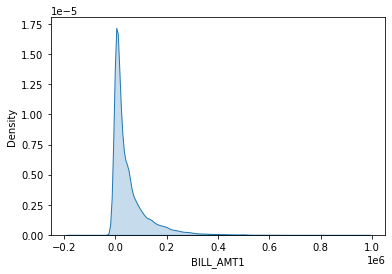

In [48]:
sns.kdeplot(df["BILL_AMT1"],fill=True)

## Feature Engineering 

In [49]:
# So here all the categorical columns are allready encoded.
# columns are >>> 
# SEX       >>> Gender (1=male, 2=female)
                                                    
# EDUCATION >>> 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
                                                    
# MARRIAGE  >>> Marital status (1=married, 2=single, 3=others)
                                                                        
# PAY_1 to PAY_6 >> Payment status for month april to september 

In [50]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [51]:
df.drop("ID",axis=1,inplace=True) #droping ID column which irrelavent 

# Feature Selection

## Checking linearity and Multicolinearity

#### Corrlation with Independent variable

In [52]:
df.corr().tail(1).T.sort_values(by="default",ascending=False)

,default
default,1.000000
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
EDUCATION,0.033842
AGE,0.013890
BILL_AMT6,-0.005372


<AxesSubplot:>

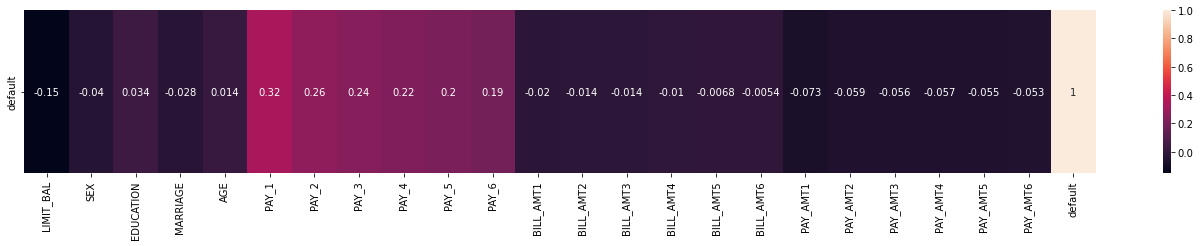

In [53]:
plt.figure(figsize=(24,3))
sns.heatmap(df.corr().tail(1),annot=True)

#### Multicolinearity-Relation between dependent variable 

In [54]:
vif = pd.DataFrame()
df1 = df.drop("default",axis=1)
vif["Features"] = df1.columns
vif["vif_score"] = [variance_inflation_factor(df1.values,i) for i in range(0,df1.shape[1])]
vif.sort_values(by="vif_score").reset_index(drop=True)

,Features,vif_score
0,PAY_AMT6,1.270652
1,PAY_AMT4,1.805061
2,PAY_AMT5,1.854268
3,PAY_AMT1,1.907550
4,PAY_AMT3,1.911650
5,PAY_1,1.918283
6,PAY_AMT2,2.384864
7,PAY_2,3.211462
8,PAY_6,3.463773
9,PAY_3,3.727665


<AxesSubplot:ylabel='Features'>

<Figure size 1080x864 with 0 Axes>

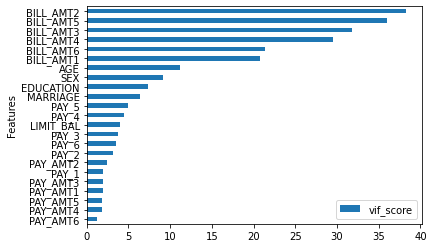

In [55]:
plt.figure(figsize=(15,12))
vif.set_index("Features").sort_values(by="vif_score").plot(kind="barh")

In [56]:
#generally vif cutoff is take between 5-10.If vifscore is greater than 10 then feature is highly corelated with another 
# independent features.

### chi square test

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [58]:
df_chi = df.copy()

In [59]:
df_chi.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [60]:
df_chi["PAY_1"].replace({-1:9,-2:10},inplace=True)

In [61]:
df_chi["PAY_2"].replace({-1:9,-2:10},inplace=True)
df_chi["PAY_3"].replace({-1:9,-2:10},inplace=True)
df_chi["PAY_4"].replace({-1:9,-2:10},inplace=True)
df_chi["PAY_5"].replace({-1:9,-2:10},inplace=True)
df_chi["PAY_6"].replace({-1:9,-2:10},inplace=True)

In [62]:
df_chi.PAY_1.value_counts()

0     14737
9      5686
1      3688
10     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64

In [63]:
x_chi = df_chi[["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
y_chi = df_chi["default"]

In [64]:
ch1,p_val = chi2(x_chi,y_chi) # cat vs cat
df2 = pd.DataFrame({"ch_square":ch1,"p_val":np.around(p_val,4)},index=x_chi.columns)
df2

,ch_square,p_val
SEX,7.146367,0.0075
EDUCATION,10.337016,0.0013
MARRIAGE,3.982131,0.0460
PAY_1,133.812186,0.0000
PAY_2,135.290611,0.0000
PAY_3,254.228952,0.0000
PAY_4,201.080739,0.0000
PAY_5,170.137062,0.0000
PAY_6,120.376956,0.0000


In [65]:
# So from above its clear that all categorical features have p_value < 0.5 so they are dependent with target variable.
# significant value : 5% >> 0.05

# p_value >= 0.05 >>  Null Hypothesis( Two variable are independent)

# p_value <0.05  >>  alternate Hypotheis (Two Variable are dependent )


## 1st approch

## Train Test Split

In [66]:
x = df.drop("default",axis=1)
y = df["default"]

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.25,stratify=y)

## Model Training 

## Logistic regression 

In [68]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation 

In [69]:
#On training dataset 
y_pred_train = log_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[17520     3]
 [ 4974     3]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     17523
           1       0.50      0.00      0.00      4977

    accuracy                           0.78     22500
   macro avg       0.64      0.50      0.44     22500
weighted avg       0.72      0.78      0.68     22500

Accuracy >> 0.7788


In [70]:
#On testing dataset 
y_pred_test = log_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[5838    3]
 [1659    0]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

Accuracy >> 0.7784


## XGboost

In [71]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
#On training dataset 
y_pred_train = xgb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[17123   400]
 [ 2240  2737]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     17523
           1       0.87      0.55      0.67      4977

    accuracy                           0.88     22500
   macro avg       0.88      0.76      0.80     22500
weighted avg       0.88      0.88      0.87     22500

Accuracy >> 0.8826666666666667


In [73]:
#On testing dataset 
y_pred_test = xgb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[5502  339]
 [1048  611]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.64      0.37      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.74      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Accuracy >> 0.8150666666666667


In [74]:
#In this problem type-2 error is important that is recall.
# Fn >> Model predicting Non-defaulter but its actually defaulter.
#Hence here we have to reduce Fn (type-2 error) and increase recall value.

## 2nd Approch

## oversampling

In [75]:
# Now we will do Oversampling as data is imbalanced >>>
# SMOTE oversampling is alaways performed on training data 

In [76]:
y.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [77]:
smote_sampling  = SMOTE(k_neighbors=4,random_state=42,sampling_strategy=0.90)
x_res,y_res = smote_sampling.fit_resample(x,y)

In [78]:
y_res.value_counts()

0    23364
1    21027
Name: default, dtype: int64

In [79]:
x_train_res,x_test_res,y_train_res,y_test_res = train_test_split(x_res,y_res,test_size=0.25,random_state=43,stratify=y_res)

## Model Training 

## Logistic regression 

In [80]:
log_model_2 = LogisticRegression()
log_model_2.fit(x_train_res,y_train_res)

LogisticRegression()

## Model Evaluation 

In [81]:
#On training dataset 
y_pred_train = log_model_2.predict(x_train_res)

cnf_matrix = confusion_matrix(y_train_res,y_pred_train)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_train_res,y_pred_train)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_train_res,y_pred_train)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[11498  6025]
 [ 6248  9522]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.65      0.66      0.65     17523
           1       0.61      0.60      0.61     15770

    accuracy                           0.63     33293
   macro avg       0.63      0.63      0.63     33293
weighted avg       0.63      0.63      0.63     33293

Accuracy >> 0.6313639503799597


In [82]:
#On testing dataset 
y_pred_test = log_model_2.predict(x_test_res)

cnf_matrix = confusion_matrix(y_test_res,y_pred_test)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_test_res,y_pred_test)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_test_res,y_pred_test)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[3811 2030]
 [2110 3147]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.64      0.65      0.65      5841
           1       0.61      0.60      0.60      5257

    accuracy                           0.63     11098
   macro avg       0.63      0.63      0.63     11098
weighted avg       0.63      0.63      0.63     11098

Accuracy >> 0.626959812578843


## Random Forest

In [83]:
rf = RandomForestClassifier()
hyper_parameters = {"n_estimators":[97,98,99,100,101,102],
                   "max_depth":np.arange(2,6),
                   "min_samples_leaf":np.arange(3,8),
                   "min_samples_split":np.arange(2,6),
                   "max_features":["sqrt", "log2"]}
rscv_rf = RandomizedSearchCV(rf,hyper_parameters,cv=5)
rscv_rf.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': [97, 98, 99, 100, 101,
                                                         102]})

In [84]:
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=6, n_estimators=102)

In [85]:
rf_model_2 =  RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,random_state=43)
rf_model_2.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=43)

In [86]:
#On training dataset 
y_pred_train = rf_model_2.predict(x_train_res)

cnf_matrix = confusion_matrix(y_train_res,y_pred_train)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_train_res,y_pred_train)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_train_res,y_pred_train)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[15237  2286]
 [ 6209  9561]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.71      0.87      0.78     17523
           1       0.81      0.61      0.69     15770

    accuracy                           0.74     33293
   macro avg       0.76      0.74      0.74     33293
weighted avg       0.76      0.74      0.74     33293

Accuracy >> 0.7448412579220858


In [87]:
#On testing dataset 
y_pred_test = rf_model_2.predict(x_test_res)

cnf_matrix = confusion_matrix(y_test_res,y_pred_test)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_test_res,y_pred_test)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_test_res,y_pred_test)
print("Accuracy >>",accuracy)

Confusion Matrix >> 
 [[5074  767]
 [2116 3141]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.71      0.87      0.78      5841
           1       0.80      0.60      0.69      5257

    accuracy                           0.74     11098
   macro avg       0.75      0.73      0.73     11098
weighted avg       0.75      0.74      0.73     11098

Accuracy >> 0.7402234636871509


## XGboost Model

In [88]:
xgb_model_2 = XGBClassifier(random_state=44)
xgb_model_2.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=44, ...)

In [91]:
#On training dataset 
y_pred_train = xgb_model_2.predict(x_train_res)

cnf_matrix = confusion_matrix(y_train_res,y_pred_train)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_train_res,y_pred_train)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_train_res,y_pred_train)
print("Accuracy >>",accuracy)

recall = recall_score(y_train_res,y_pred_train)
print("Recall >>",recall)

Confusion Matrix >> 
 [[16193  1330]
 [ 2222 13548]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     17523
           1       0.91      0.86      0.88     15770

    accuracy                           0.89     33293
   macro avg       0.89      0.89      0.89     33293
weighted avg       0.89      0.89      0.89     33293

Accuracy >> 0.8933109061964978
Recall >> 0.8590995561192137


In [92]:
#On testing dataset 
y_pred_test = xgb_model_2.predict(x_test_res)

cnf_matrix = confusion_matrix(y_test_res,y_pred_test)
print("Confusion Matrix >> \n",cnf_matrix)

clf_report = classification_report(y_test_res,y_pred_test)
print("Classififcation report >> \n",clf_report)

accuracy = accuracy_score(y_test_res,y_pred_test)
print("Accuracy >>",accuracy)

recall = recall_score(y_test_res,y_pred_test)
print("Recall >>",recall)

Confusion Matrix >> 
 [[4977  864]
 [1196 4061]]
Classififcation report >> 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      5841
           1       0.82      0.77      0.80      5257

    accuracy                           0.81     11098
   macro avg       0.82      0.81      0.81     11098
weighted avg       0.81      0.81      0.81     11098

Accuracy >> 0.814380969544062
Recall >> 0.7724938177667872


## 3rd Approch

In [91]:
# In this approch we will only normaliza data (apply gaussian distrubution) on only numerical columns and we will train 
# model again.

In [92]:
x_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44391 entries, 0 to 44390
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  44391 non-null  float64
 1   SEX        44391 non-null  int64  
 2   EDUCATION  44391 non-null  int64  
 3   MARRIAGE   44391 non-null  int64  
 4   AGE        44391 non-null  int64  
 5   PAY_1      44391 non-null  int64  
 6   PAY_2      44391 non-null  int64  
 7   PAY_3      44391 non-null  int64  
 8   PAY_4      44391 non-null  int64  
 9   PAY_5      44391 non-null  int64  
 10  PAY_6      44391 non-null  int64  
 11  BILL_AMT1  44391 non-null  float64
 12  BILL_AMT2  44391 non-null  float64
 13  BILL_AMT3  44391 non-null  float64
 14  BILL_AMT4  44391 non-null  float64
 15  BILL_AMT5  44391 non-null  float64
 16  BILL_AMT6  44391 non-null  float64
 17  PAY_AMT1   44391 non-null  float64
 18  PAY_AMT2   44391 non-null  float64
 19  PAY_AMT3   44391 non-null  float64
 20  PAY_AM

In [93]:
x_res_num_cols = x_res[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"
                       ,"PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

In [94]:
normal = MinMaxScaler()
arr = normal.fit_transform(x_res_num_cols)
df_normalize_num_cols = pd.DataFrame(arr,columns=x_res_num_cols.columns)

In [95]:
x_res.drop(["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"
                       ,"PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],axis=1,inplace=True)

In [96]:
x_res_normalized = pd.concat([x_res,df_normalize_num_cols],axis=1)

In [97]:
x_res_normalized.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,120000.0,2,2,2,26,-1,2,0,0,0,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,90000.0,2,2,2,34,0,0,0,0,0,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,50000.0,2,2,1,37,0,0,0,0,0,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


### Train Test Split

In [98]:
y_res.shape

(44391,)

In [120]:
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res_normalized,y_res,test_size=0.25,random_state=45,stratify=y_res)

## Model Trainings 

### Logistic regression 

In [121]:
log_model_3 = LogisticRegression()
log_model_3.fit(x_res_train,y_res_train)

LogisticRegression()

### Evaluation 

In [122]:
#On training data
y_pred_train = log_model_3.predict(x_res_train)

cnf_mtx = confusion_matrix(y_res_train,y_pred_train)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_train,y_pred_train)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_train,y_pred_train)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[17523     0]
 [15770     0]]
classification report >>
               precision    recall  f1-score   support

           0       0.53      1.00      0.69     17523
           1       0.00      0.00      0.00     15770

    accuracy                           0.53     33293
   macro avg       0.26      0.50      0.34     33293
weighted avg       0.28      0.53      0.36     33293

Accuracy>> 0.5263268554951491


In [123]:
#On testing data
y_pred_test = log_model_3.predict(x_res_test)

cnf_mtx = confusion_matrix(y_res_test,y_pred_test)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_test,y_pred_test)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_test,y_pred_test)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[5841    0]
 [5257    0]]
classification report >>
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      5841
           1       0.00      0.00      0.00      5257

    accuracy                           0.53     11098
   macro avg       0.26      0.50      0.34     11098
weighted avg       0.28      0.53      0.36     11098

Accuracy>> 0.5263110470355019


### SVM Model 

In [124]:
svm_model_3 = SVC()
svm_model_3.fit(x_res_train,y_res_train)

SVC()

### Evaluation 

In [125]:
#On training data
y_pred_train = svm_model_3.predict(x_res_train)

cnf_mtx = confusion_matrix(y_res_train,y_pred_train)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_train,y_pred_train)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_train,y_pred_train)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[10866  6657]
 [ 7030  8740]]
classification report >>
               precision    recall  f1-score   support

           0       0.61      0.62      0.61     17523
           1       0.57      0.55      0.56     15770

    accuracy                           0.59     33293
   macro avg       0.59      0.59      0.59     33293
weighted avg       0.59      0.59      0.59     33293

Accuracy>> 0.588892559997597


In [126]:
#On testing data
y_pred_test = svm_model_3.predict(x_res_test)

cnf_mtx = confusion_matrix(y_res_test,y_pred_test)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_test,y_pred_test)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_test,y_pred_test)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[3684 2157]
 [2350 2907]]
classification report >>
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      5841
           1       0.57      0.55      0.56      5257

    accuracy                           0.59     11098
   macro avg       0.59      0.59      0.59     11098
weighted avg       0.59      0.59      0.59     11098

Accuracy>> 0.5938907911335376


### Random Forest Model

In [127]:
rf = RandomForestClassifier()
hyper_parameters = {"n_estimators":[97,98,99,100,101,102],
                   "max_depth":np.arange(2,6),
                   "min_samples_leaf":np.arange(3,8),
                   "min_samples_split":np.arange(2,6),
                   "max_features":["sqrt", "log2"]}
rscv_rf = RandomizedSearchCV(rf,hyper_parameters,cv=5)
rscv_rf.fit(x_res_train,y_res_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': [97, 98, 99, 100, 101,
                                                         102]})

In [128]:
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=102)

In [129]:
rf_model_3 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=97,random_state=43)
rf_model_3.fit(x_res_train,y_res_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=97,
                       random_state=43)

### Evaluation

In [130]:
#On training data
y_pred_train = rf_model_3.predict(x_res_train)

cnf_mtx = confusion_matrix(y_res_train,y_pred_train)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_train,y_pred_train)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_train,y_pred_train)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[15259  2264]
 [ 6191  9579]]
classification report >>
               precision    recall  f1-score   support

           0       0.71      0.87      0.78     17523
           1       0.81      0.61      0.69     15770

    accuracy                           0.75     33293
   macro avg       0.76      0.74      0.74     33293
weighted avg       0.76      0.75      0.74     33293

Accuracy>> 0.7460427116811341


In [131]:
#On testing data
y_pred_test = rf_model_3.predict(x_res_test)

cnf_mtx = confusion_matrix(y_res_test,y_pred_test)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_test,y_pred_test)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_test,y_pred_test)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[5094  747]
 [2148 3109]]
classification report >>
               precision    recall  f1-score   support

           0       0.70      0.87      0.78      5841
           1       0.81      0.59      0.68      5257

    accuracy                           0.74     11098
   macro avg       0.75      0.73      0.73     11098
weighted avg       0.75      0.74      0.73     11098

Accuracy>> 0.7391421877815822


### XGBoost Model 

In [132]:
xgb_model_3 = XGBClassifier()
xgb_model_3.fit(x_res_train,y_res_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Evaluation 

In [133]:
#On training data
y_pred_train = xgb_model_3.predict(x_res_train)

cnf_mtx = confusion_matrix(y_res_train,y_pred_train)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_train,y_pred_train)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_train,y_pred_train)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[16224  1299]
 [ 2202 13568]]
classification report >>
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     17523
           1       0.91      0.86      0.89     15770

    accuracy                           0.89     33293
   macro avg       0.90      0.89      0.89     33293
weighted avg       0.90      0.89      0.89     33293

Accuracy>> 0.8948427597392845


In [134]:
#On testing data
y_pred_test = xgb_model_3.predict(x_res_test)

cnf_mtx = confusion_matrix(y_res_test,y_pred_test)
print("Confusion Matrix >>\n",cnf_mtx)

clf_report = classification_report(y_res_test,y_pred_test)
print("classification report >>\n",clf_report)

accuracy = accuracy_score(y_res_test,y_pred_test)
print("Accuracy>>",accuracy)

Confusion Matrix >>
 [[4994  847]
 [1228 4029]]
classification report >>
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      5841
           1       0.83      0.77      0.80      5257

    accuracy                           0.81     11098
   macro avg       0.81      0.81      0.81     11098
weighted avg       0.81      0.81      0.81     11098

Accuracy>> 0.8130293746621012


## Conclusion

In [135]:
# From all above trained models we get better accuracy with XGboost algorithm with oversampling of data.so we will go with
# only oversampling with xgboost model.

In [136]:
result = pd.DataFrame({"Models":["Logistic regression model","RF model","XGB model"],
                      "Train_accuracy":[0.63,0.74,0.89],
                      "Test_accuracy":[0.62,0.74,0.81]})
result

,Models,Train_accuracy,Test_accuracy
0,Logistic regression model,0.63,0.62
1,RF model,0.74,0.74
2,XGB model,0.89,0.81


<AxesSubplot:xlabel='Models'>

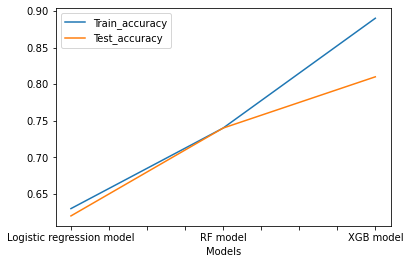

In [137]:
result.plot(x="Models",y=["Train_accuracy","Test_accuracy"],kind="line")

### UI work 

In [138]:
import pickle
import json

In [268]:
with open("xgb_model.pkl","wb") as f:
    pickle.dump(xgb_model_2,f)

In [141]:
x_res_normalized.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [142]:
columns_data = {"SEX":{1:"male", 2:"female"},
               "EDUCATION":{1:"School Graduate",2:"University Graduate",3:"Highschool Graduate",4:"Others"},
               "MARRIAGE":{1:"married", 2:"single", 3:"others"},
               "PAY":{-2:"No consumption or no use of credit",-1 : "pay duly",
                       0:"Use of revolving credit(pay min due)", 
                       1:"payment delay for one month", 2:"payment delay for two months",
                       3:"payment delay for three months",4:"payment delay for four months",
                       5:"payment delay for five months",6:"payment delay for six months",
                       7:"payment delay for seven months",8:"payment delay for eight months",
                       9:"payment delay for nine months and above"},
               "COLUMNS":list(x_res_normalized.columns)}

In [143]:
with open("columns_data.json","w") as f:
    json.dump(columns_data,f)

In [264]:
x_train_res.sample(1).T

,36034
LIMIT_BAL,20000.000000
SEX,1.000000
EDUCATION,3.000000
MARRIAGE,1.000000
AGE,50.000000
PAY_1,0.000000
PAY_2,0.000000
PAY_3,0.000000
PAY_4,0.000000
PAY_5,1.000000


In [262]:
test_array = [100177.948900,1,2,2,26,0,0,0,0,0,1,53268.433585,39104.790676,40026.678964,40557.147511,
             43552.090485,41398.759145,1960.580259,1953.925334,1509.004214,3687.650346,53.562619,1705.569801]

In [263]:
len(test_array)

23

In [267]:
xgb_model_2.predict([test_array],validate_features=False)[0]

1